# About Dataset

## Context

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

## Data Description

### Train Data


- id: Unique ID for the customer
- Gender: Gender of the customer
- Age:	Age of the customer
- Driving_License: 0  Customer does not have DL, 1  Customer already has DL
- Region_Code: Unique code for the region of the customer
- Previously_Insured: 1 Customer already has Vehicle Insurance, 0 Customer doesn't have Vehicle Insurance
- Vehicle_Age: Age of the Vehicle
- Vehicle_Damage: 1 Customer got his/her vehicle damaged in the past. 0 Customer didn't get his/her vehicle damaged in the past.
- Annual_Premium: The amount customer needs to pay as premium in the year
- Policy_Sales_Channel: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
- Vintage: Number of Days, Customer has been associated with the company
- Response: 1 Customer is interested, 0 Customer is not interested

# 0.0 Imports

In [88]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import psycopg2 as pg
import sqlalchemy as db
import matplotlib.pyplot as plt
import seaborn as sns

from sqlalchemy import create_engine

from sklearn.model_selection import train_test_split
from fast_ml.model_development import train_valid_test_split
from fast_ml import eda


from IPython.display import display, HTML

 ## 0.1 Helper Functions

In [109]:
def jupyter_settings():
    %matplotlib inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display(HTML("<style>.container { width:95% !important; }</style>"))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    
    sns.set

In [110]:
jupyter_settings()

## 0.2 Loading Data

In [4]:
#credentials

host = 'comunidade-ds-postgres.c50pcakiuwi3.us-east-1.rds.amazonaws.com'
port = 5432
database = 'comunidadedsdb'
username = 'member'
pwd = 'cdspa'

In [5]:
#create string connection and postgre engine

string_connect = 'postgresql://' + username + ':' + pwd + '@' + host + ':' + str(port) + '/' + database
engine = db.create_engine(string_connect)
conn1 = engine.connect()


In [6]:
# make query

query_tables = """

SELECT * 
FROM pa004.users u LEFT JOIN pa004.vehicle v ON (u.id = v.id)
				   LEFT JOIN pa004.insurance i ON (u.id = i.id)



"""

In [125]:
# Read dataFrame

df = pd.read_sql(query_tables, conn1)
df.head()

,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
0,7,Male,23,11.0,152.0,1,< 1 Year,Yes,0,23367.0,249,0
1,13,Female,41,15.0,14.0,1,1-2 Year,No,1,31409.0,221,0
2,18,Female,25,35.0,152.0,1,< 1 Year,No,1,46622.0,299,0
3,31,Female,26,8.0,160.0,1,< 1 Year,No,0,2630.0,136,0
4,39,Male,45,8.0,124.0,1,1-2 Year,Yes,0,42297.0,264,0


## 0.3 Split data frame in Train, Validation and Test

In [113]:
#X = df.drop(['response'], axis=1)
#y = df['response']

In [114]:
#Split train-test

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [115]:
# Split Train_validation

#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=42)

# 1.0 Descrição dos Dados

In [127]:
#df1 = X_train.copy()
df1 = df.copy()

## 1.1 Rename Columns

In [128]:
df1.columns

Index(['id', 'gender', 'age', 'region_code', 'policy_sales_channel',
       'driving_license', 'vehicle_age', 'vehicle_damage',
       'previously_insured', 'annual_premium', 'vintage', 'response'],
      dtype='object')

## 1.2 Data Dimension

In [129]:
df1.shape

(381109, 12)

## 1.3 Data Types

In [130]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   gender                381109 non-null  object 
 2   age                   381109 non-null  int64  
 3   region_code           381109 non-null  float64
 4   policy_sales_channel  381109 non-null  float64
 5   driving_license       381109 non-null  int64  
 6   vehicle_age           381109 non-null  object 
 7   vehicle_damage        381109 non-null  object 
 8   previously_insured    381109 non-null  int64  
 9   annual_premium        381109 non-null  float64
 10  vintage               381109 non-null  int64  
 11  response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


## 1.4 Check NA

In [131]:
df1.isna().sum()

id                      0
gender                  0
age                     0
region_code             0
policy_sales_channel    0
driving_license         0
vehicle_age             0
vehicle_damage          0
previously_insured      0
annual_premium          0
vintage                 0
response                0
dtype: int64

## 1.5 Change Types

In [132]:
df1.dtypes

id                        int64
gender                   object
age                       int64
region_code             float64
policy_sales_channel    float64
driving_license           int64
vehicle_age              object
vehicle_damage           object
previously_insured        int64
annual_premium          float64
vintage                   int64
response                  int64
dtype: object

In [133]:
df1['region_code'] = df1['region_code'].astype(int)
df1['policy_sales_channel'] = df1['policy_sales_channel'].astype(int)

## 1.6 Descriptive Statistical

In [135]:
num_attributes = df1.select_dtypes( include = ['int32', 'int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude = ['int32', 'int64', 'float'] )

### 1.6.1 Numerical Attributes

In [136]:
# Central tendency metrics

ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T


# Dispersionl metrics - std, min, max, range, kurtosis, skew

d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

m = pd.concat( [ d2, d3, ct1, ct2, d1, d4, d5, d6 ]).T.reset_index()

m.columns = ( [ 'features', 'min', 'max', 'mean', 'median', 'std', 'range', 'skew', 'kurtosis'])

m

,features,min,max,mean,median,std,range,skew,kurtosis
0,id,1.0,381109.0,190555.000000,190555.0,110016.691870,381108.0,-8.071174e-18,-1.200000
1,age,20.0,85.0,38.822584,36.0,15.511591,65.0,6.725390e-01,-0.565655
2,region_code,0.0,52.0,26.388807,28.0,13.229871,52.0,-1.152664e-01,-0.867857
3,policy_sales_channel,1.0,163.0,112.034295,133.0,54.203924,162.0,-9.000081e-01,-0.970810
4,driving_license,0.0,1.0,0.997869,1.0,0.046109,1.0,-2.159518e+01,464.354302
5,vehicle_damage,0.0,1.0,0.495123,0.0,0.499976,1.0,1.950724e-02,-1.999630
6,previously_insured,0.0,1.0,0.458210,0.0,0.498251,1.0,1.677471e-01,-1.971871
7,annual_premium,2630.0,540165.0,30564.389581,31669.0,17213.132474,537535.0,1.766087e+00,34.004569
8,vintage,10.0,299.0,154.347397,154.0,83.671194,289.0,3.029517e-03,-1.200688
9,response,0.0,1.0,0.122563,0.0,0.327935,1.0,2.301906e+00,3.298788


### 1.7.1 Categorical Attributes

In [137]:
cat_attributes.apply(lambda x: x.unique().shape[0])

gender         2
vehicle_age    3
dtype: int64

In [154]:
df1[['gender', 'response']].groupby('response').value_counts().reset_index()

,response,gender,count
0,0,Male,177564
1,0,Female,156835
2,1,Male,28525
3,1,Female,18185


In [155]:
df1[['vehicle_age', 'response']].groupby('response').value_counts().reset_index()

,response,vehicle_age,count
0,0,1-2 Year,165510
1,0,< 1 Year,157584
2,0,> 2 Years,11305
3,1,1-2 Year,34806
4,1,< 1 Year,7202
5,1,> 2 Years,4702


# 2.0 Featuring Engineering

In [200]:
df2 = df1.copy()

## 2.1 Criação das Hipóteses

### 2.1.1 Hipóteses Cliente

**1-** CLientes com mais idade deveriam ter mais propensão a comprar o seguro

**2-** CLientes sem habilitação deveriam ter mais propensão a comprar o seguro

**3-** CLientes que ganham maior remuneração deveriam ter mais propensão a comprar

**4-** Pessoas que são clientes a mais tempo deveriam ter mais propensão a comprar

**5-** Clientes do gênero femnino deveriam ter mais propensão a comprar

**6-** Clientes com prêmio de seguro anual menor deveriam ter mais propensão a comprar

**7-** Clientes que já tem seguro deveriam ter menos propensão a comprar



### 2.1.2 Hipóteses do Veículo

**1-** Clientes com veículos mais novos deveriam ter mais propensão a comprar

**2-** Clientes com veículos que já sofreram acidentes deveriam ter mais propensão a comprar

## 2.2 Lista Final das Hipóteses

**1-** CLientes com mais idade deveriam ter mais propensão a comprar o seguro

**2-** CLientes sem habilitação deveriam ter mais propensão a comprar o seguro

**3-** CLientes que ganham maior remuneração deveriam ter mais propensão a comprar

**4-** Pessoas que são clientes a mais tempo deveriam ter mais propensão a comprar

**5-** Clientes do gênero femnino deveriam ter mais propensão a comprar

**6-** Clientes com prêmio de seguro anual menor deveriam ter mais propensão a comprar

**7-** Clientes que já tem seguro deveriam ter menos propensão a comprar

**8-** Clientes com veículos mais novos deveriam ter mais propensão a comprar

**9-** Clientes com veículos que já sofreram acidentes deveriam ter mais propensão a comprar

## 2.3 Feature Engineering

In [375]:
# vehicle_damage

#df2['vehicle_damage'] = df2['vehicle_damage'].apply(lambda x: 1 if x == 'Yes' else 0)

# vehicle_age

#df2['vehicle_age'] = df2['vehicle_age'].apply(lambda x:  '1 year' if x == '< 1 Year' else 'between 1 and 2 years' if x == '1-2 Year' else 'more 2 year')


df2['time_of_customer'] = df['vintage'].apply(lambda x: 'new' if x < 50 else 'moderate' if x < 100 else 'medium' if x < 150 else 'professional' if x < 200 else 'expert' if x < 250 else 'old')


# 3.0 Exploratory Data Analysis

In [376]:
df3 = df2.copy()

## 3.1 Análise Univariada

### 3.1.1 Response Variable

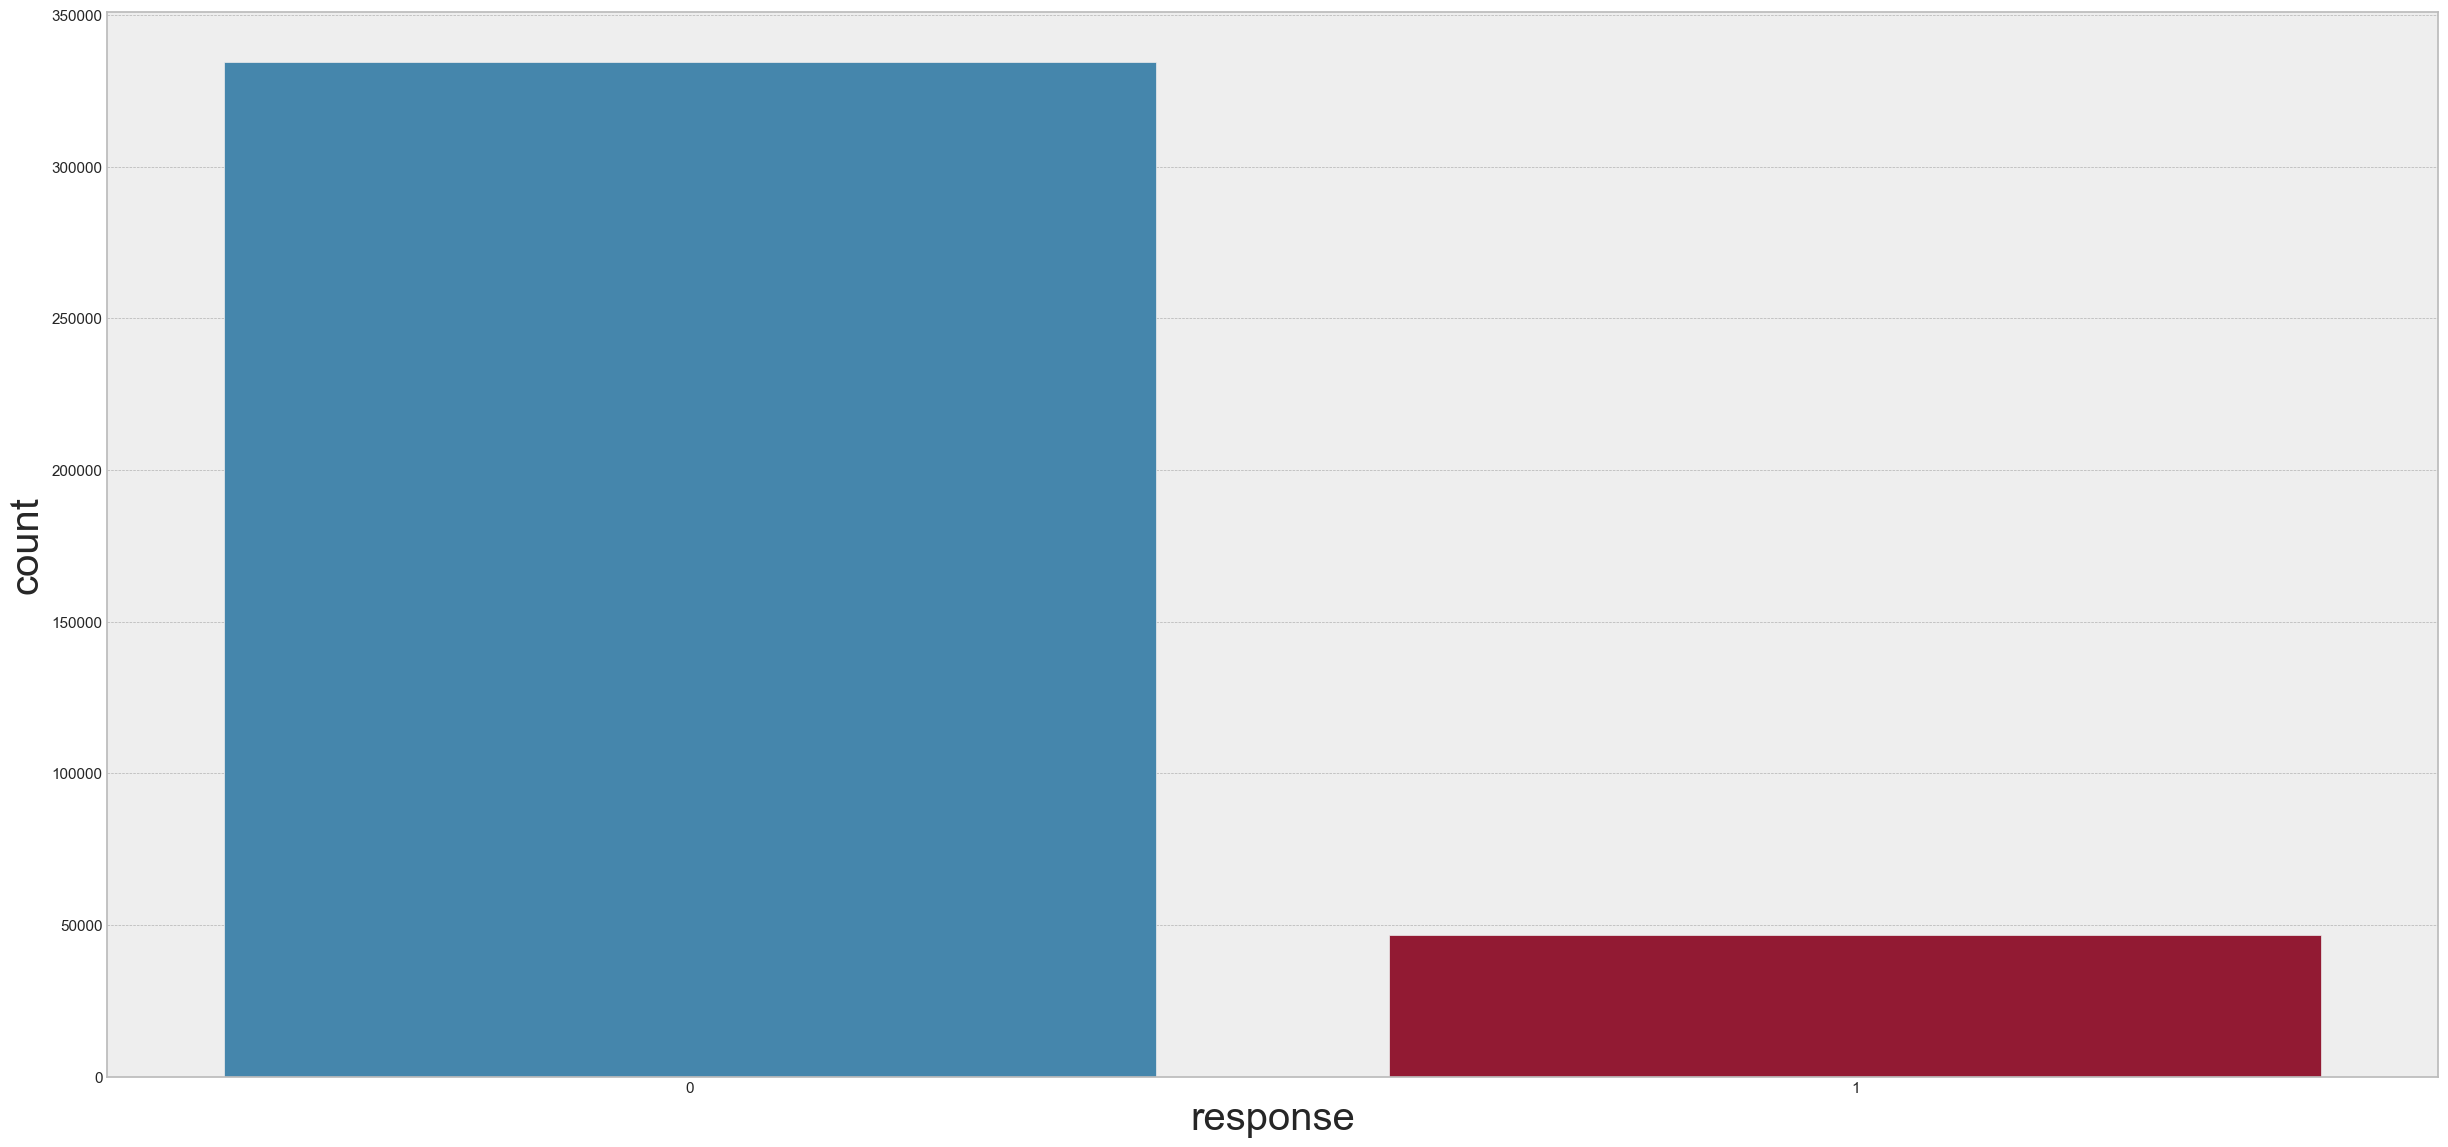

In [285]:
sns.countplot(data = df3, x='response')
plt.tight_layout();

### 3.1.2 Numerical Variable

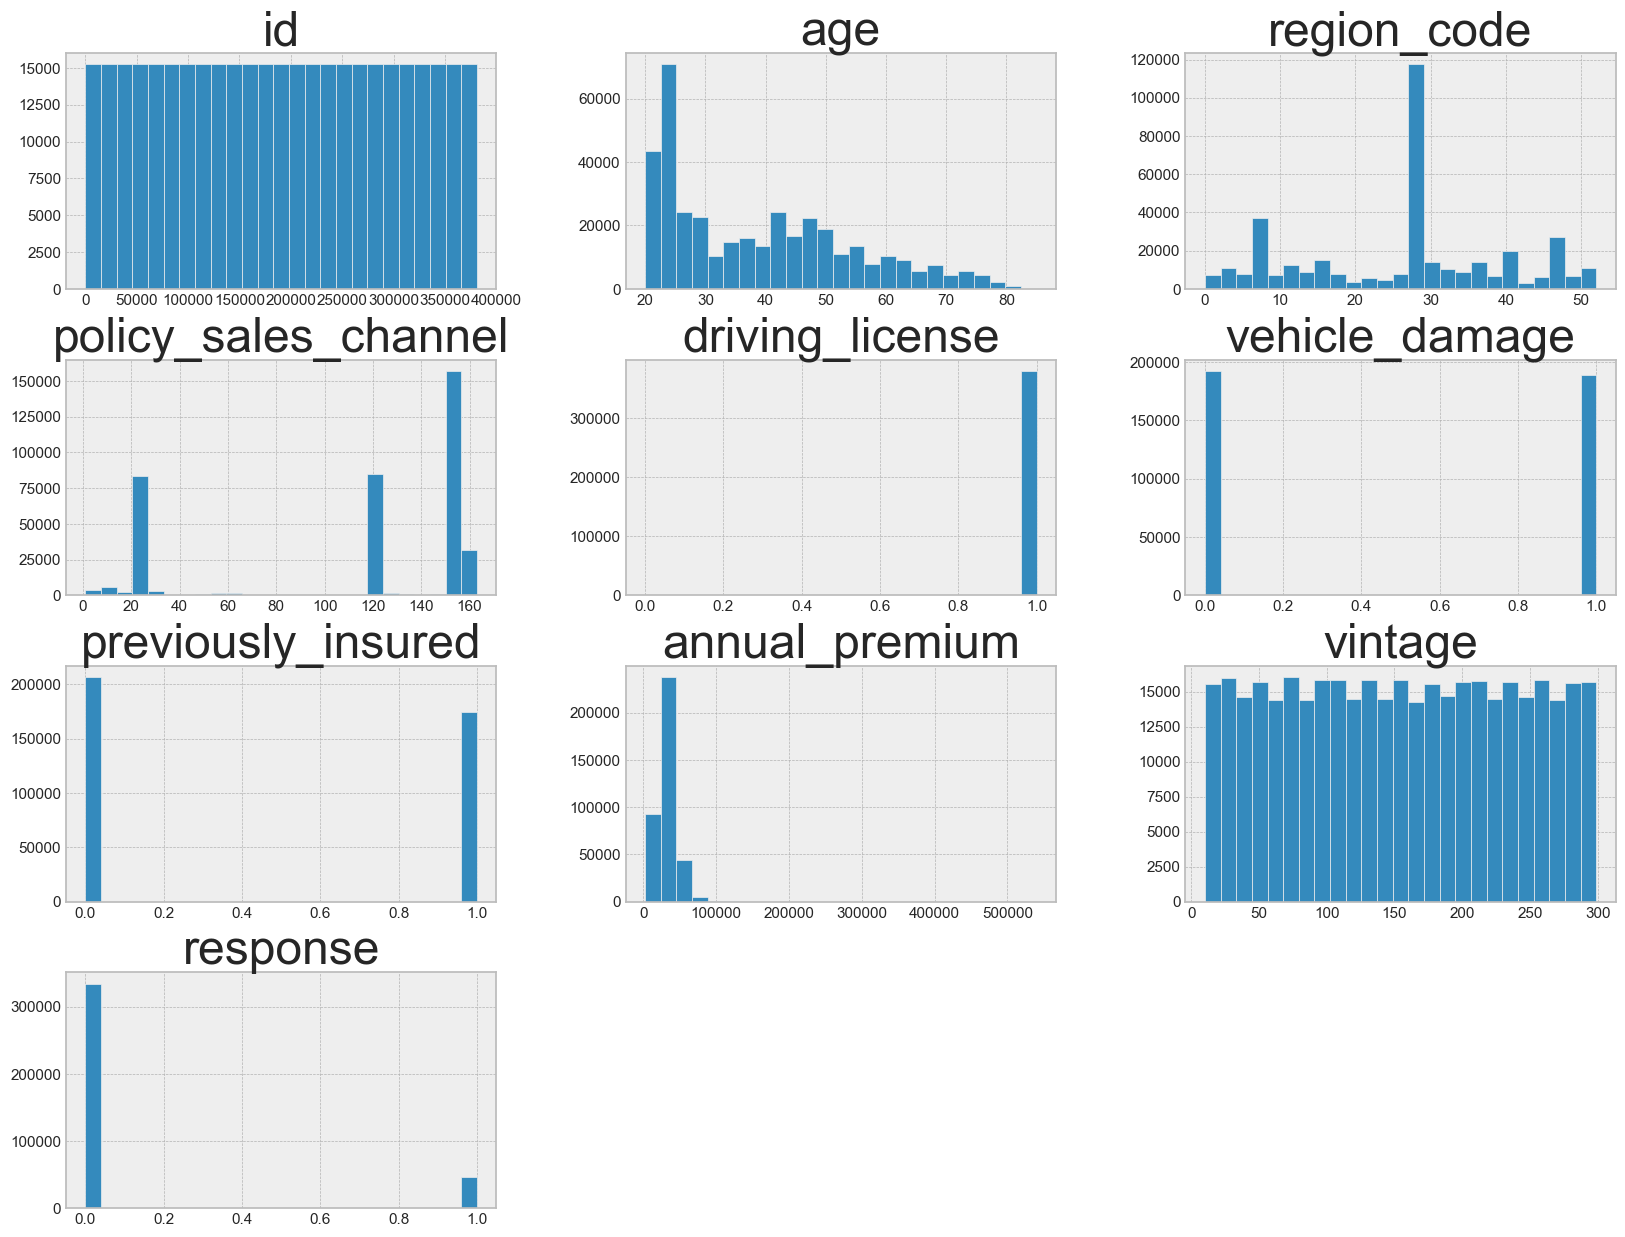

In [274]:
num_attributes = df3.select_dtypes(include = ['int32', 'int64', 'float64'])
num_attributes.hist(bins=25, figsize=(20,15));

### 3.1.3 Categorical Variable

In [276]:
cat_variables = df3.select_dtypes(exclude = ['int32', 'int64', 'float64'])
cat_variables.head()

,gender,vehicle_age
0,Male,< 1 Year
1,Female,1-2 Year
2,Female,< 1 Year
3,Female,< 1 Year
4,Male,1-2 Year


<Axes: xlabel='response', ylabel='Density'>

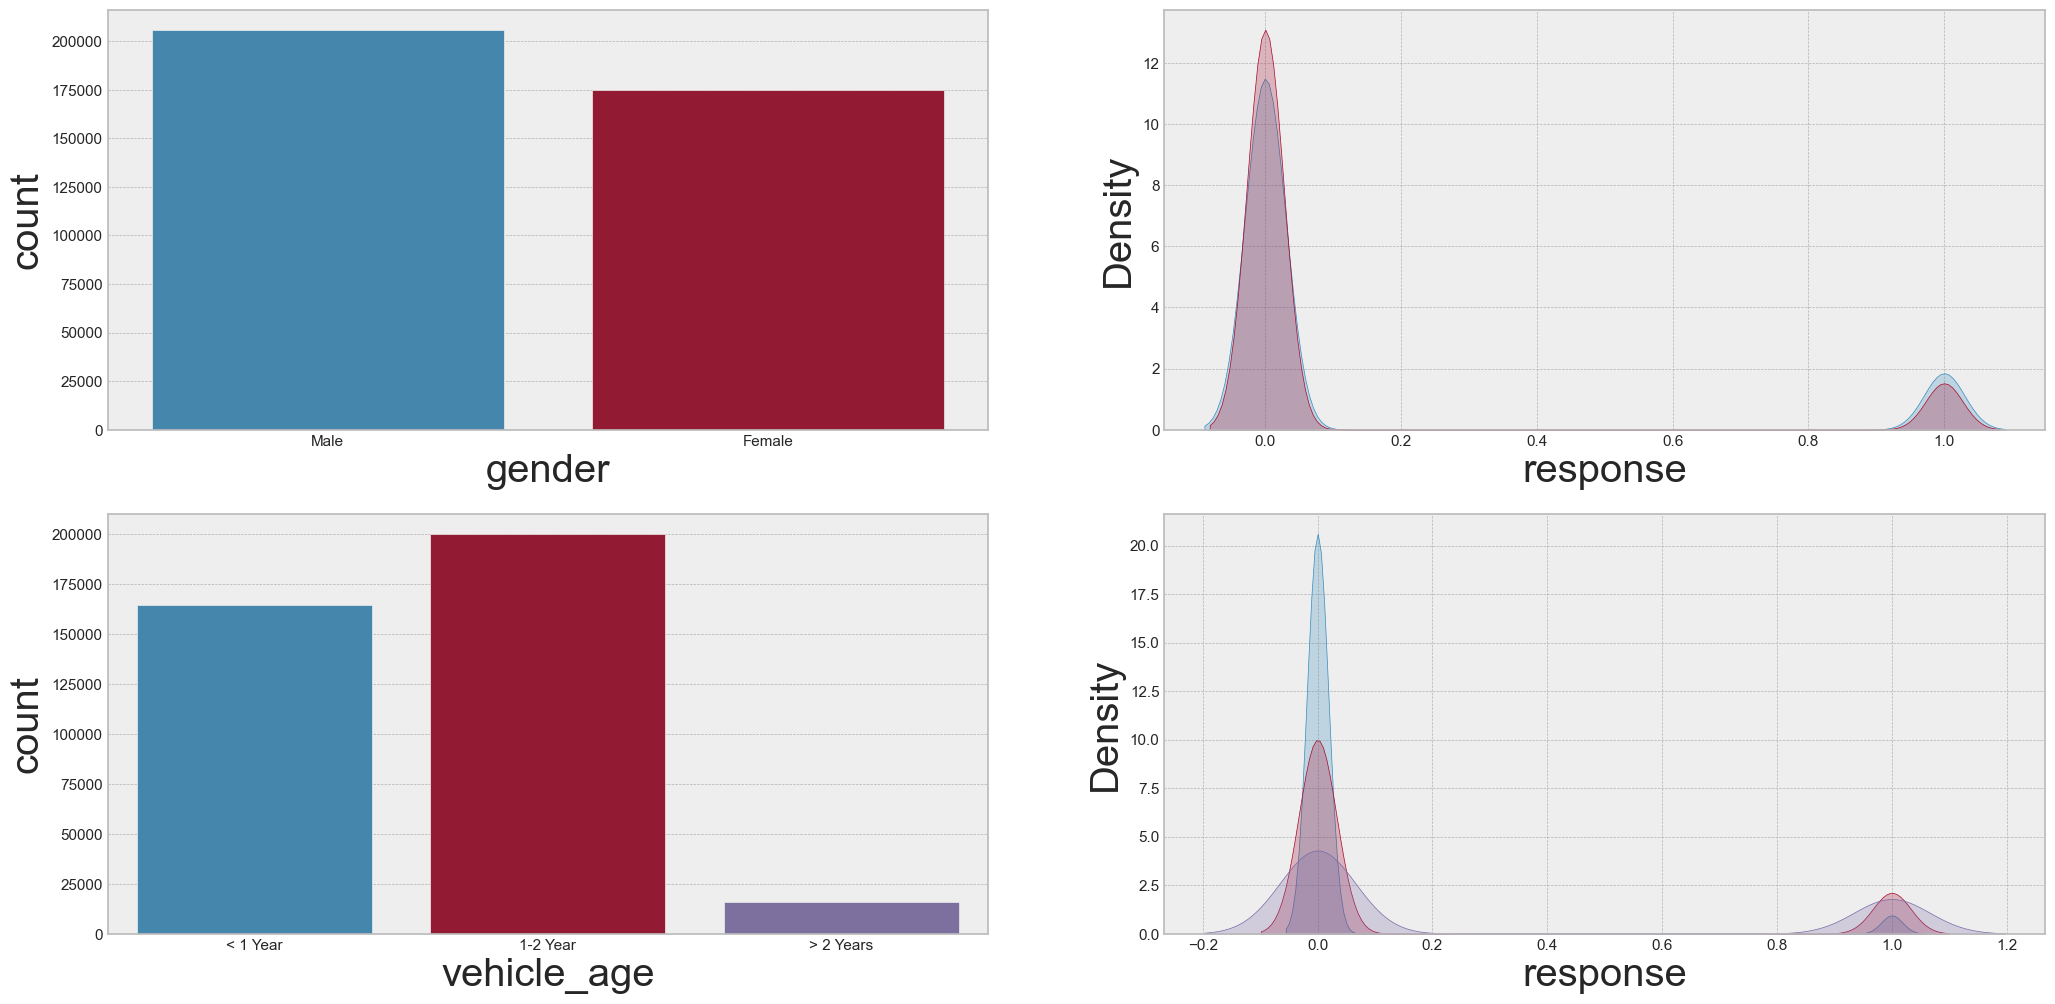

In [290]:
plt.subplot(2, 2, 1)
sns.countplot(data = df3, x='gender')

plt.subplot(2, 2, 2)
sns.kdeplot(df3[df3['gender'] == 'Male']['response'], label='Male', fill=True)
sns.kdeplot(df3[df3['gender'] == 'Female']['response'], label='Female', fill=True)

plt.subplot(2,2, 3)
sns.countplot(data=df3, x='vehicle_age')

plt.subplot(2, 2, 4)
sns.kdeplot(df3[df3['vehicle_age'] == '< 1 Year']['response'], label='< 1 Year', fill=True)
sns.kdeplot(df3[df3['vehicle_age'] == '1-2 Year']['response'], label='1-2 Year', fill=True)
sns.kdeplot(df3[df3['vehicle_age'] == '> 2 Years']['response'], label='> 2 Years', fill=True)

## 3.2 Análise Bivariada

### H1 - Clientes com mais idade deveriam ter mais propensão a comprar o seguro

**FALSA:** Esse crescimento só existe até a idade estar próximo a média e mediana, após essa idade a própensão tende a cair.

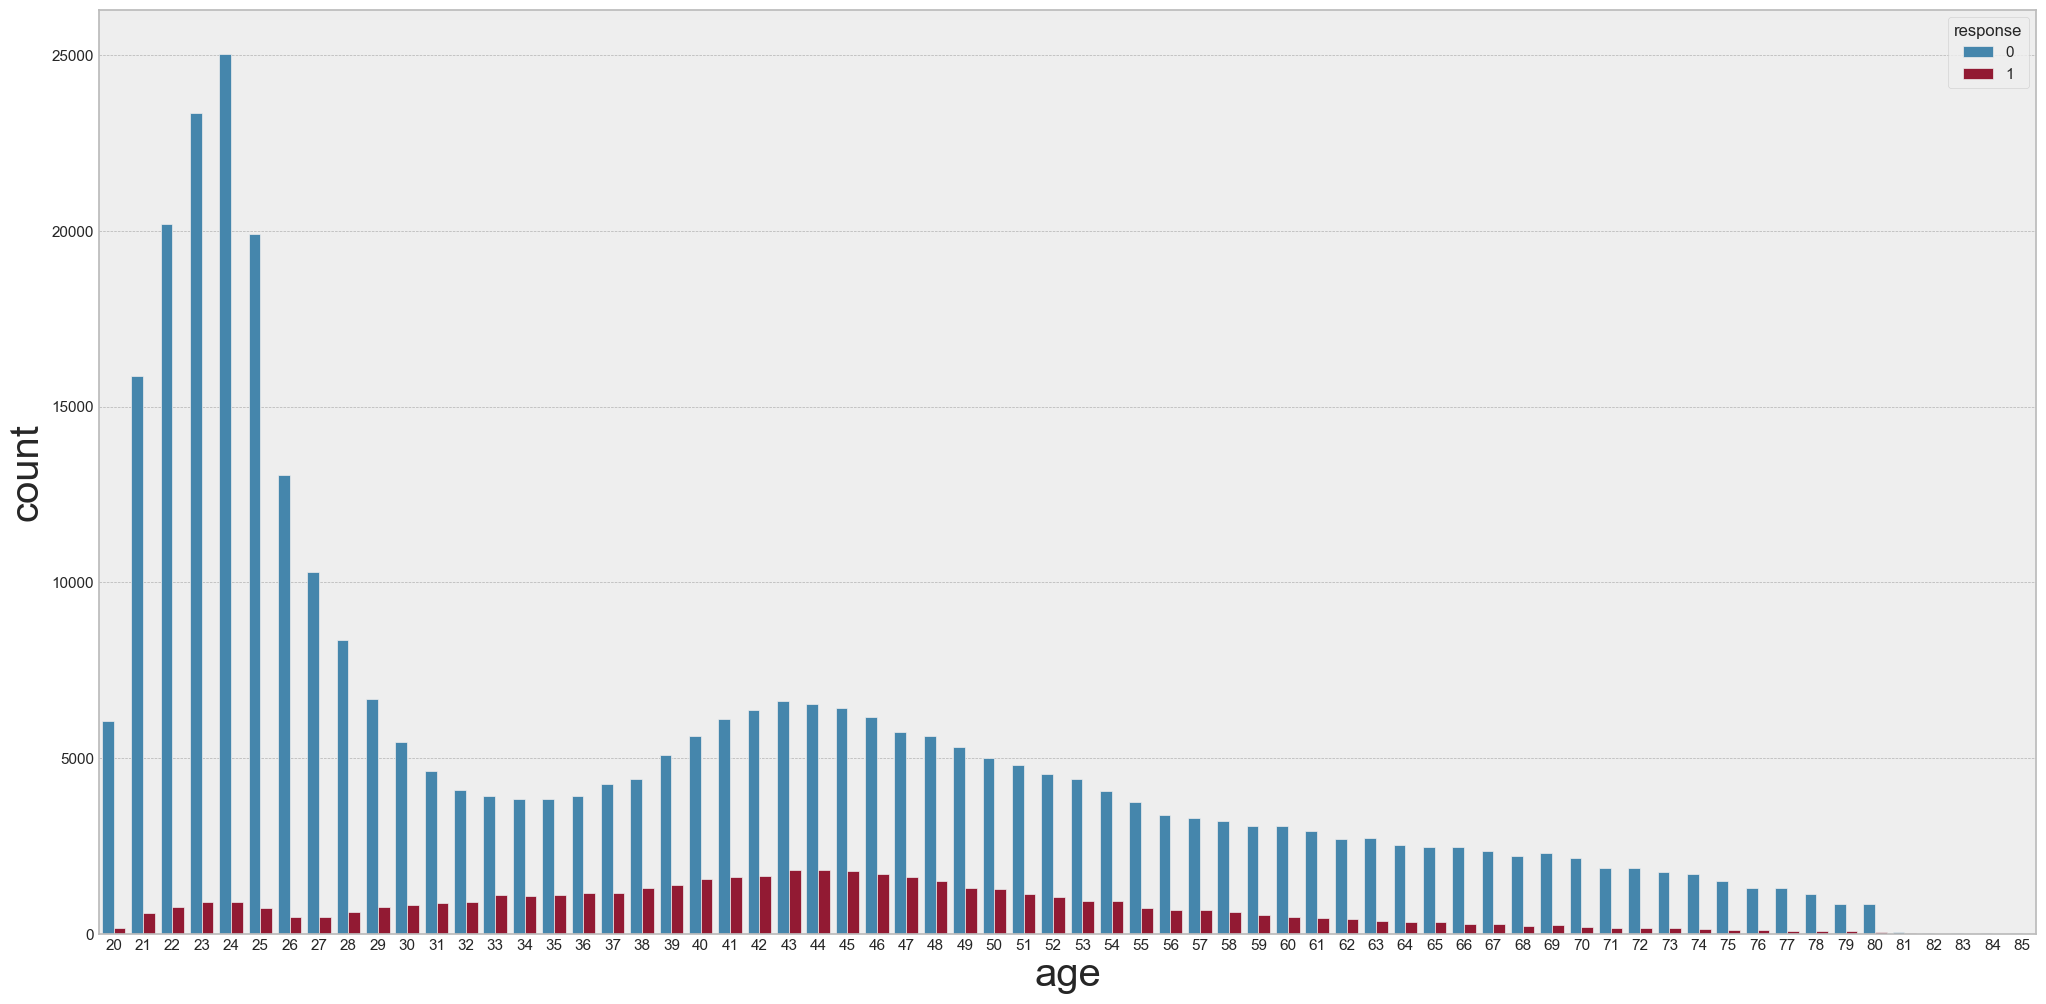

In [343]:
sns.countplot(data= df3, x='age', hue='response');

### H2- Clientes sem habilitação deveriam ter mais propensão a comprar o seguro

**FALSA:** Pessoas sem habilitação tem menos propensão a comprar o seguro

In [371]:
# Percentual de compra dos sem habilitação
total_sem_licensa =  ((((aux2['response'] == 1).sum()) / (len(aux2))) * 100).round(2)
print(f'Das pessoas sem habilitação {total_sem_licensa}% tem propensão a comprar o seguro.')

# Percentual de compra dos habilitados
total_com_licensa =  ((((aux2_['response'] == 1).sum()) / (len(aux2_))) * 100).round(2)
print(f'Das pessoas com habilitação {total_com_licensa}% tem propensão a comprar o seguro.')

Das pessoas sem habilitação 5.05% tem propensão a comprar o seguro.
Das pessoas com habilitação 12.27% tem propensão a comprar o seguro.


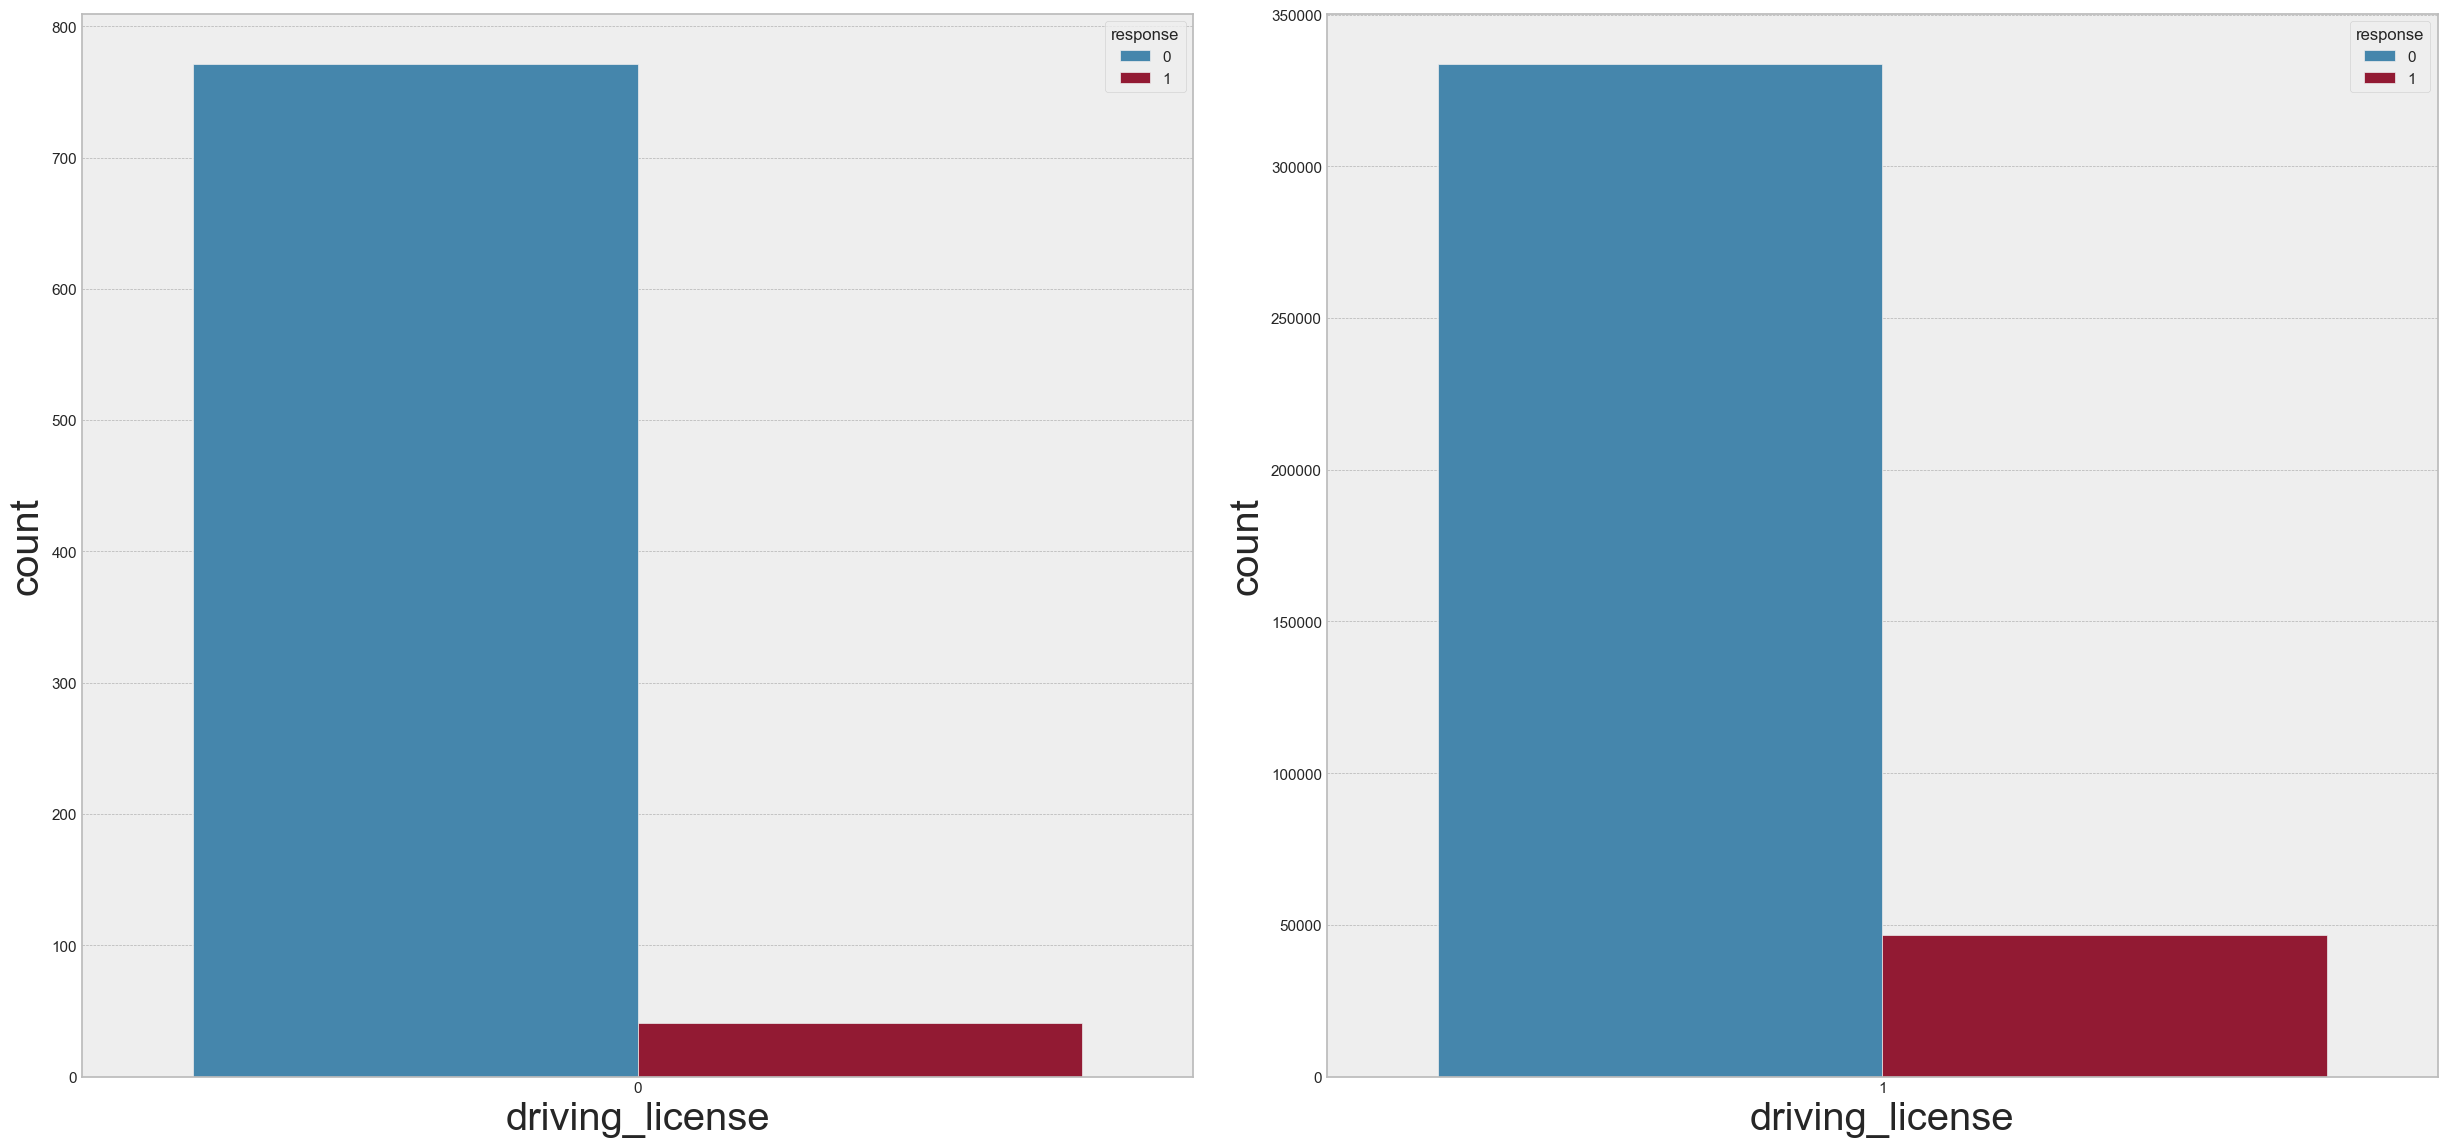

In [355]:
# Sem habilitação
plt.subplot(1, 2, 1)
aux2 = df3[df3['driving_license'] == 0]
sns.countplot(data=aux2, x='driving_license', hue='response')

# Habilitados
aux2_ = df3[df3['driving_license'] == 1]
sns.countplot(data=aux2_, x='driving_license', hue='response')
plt.tight_layout();

### H3- Pessoas que são clientes a mais tempo deveriam ter mais propensão a comprar

**FALSA:** A propensão a compra se mantém a mesma com pessoas que são clientes a mais de 40 dias


<Axes: xlabel='time_of_customer', ylabel='count'>

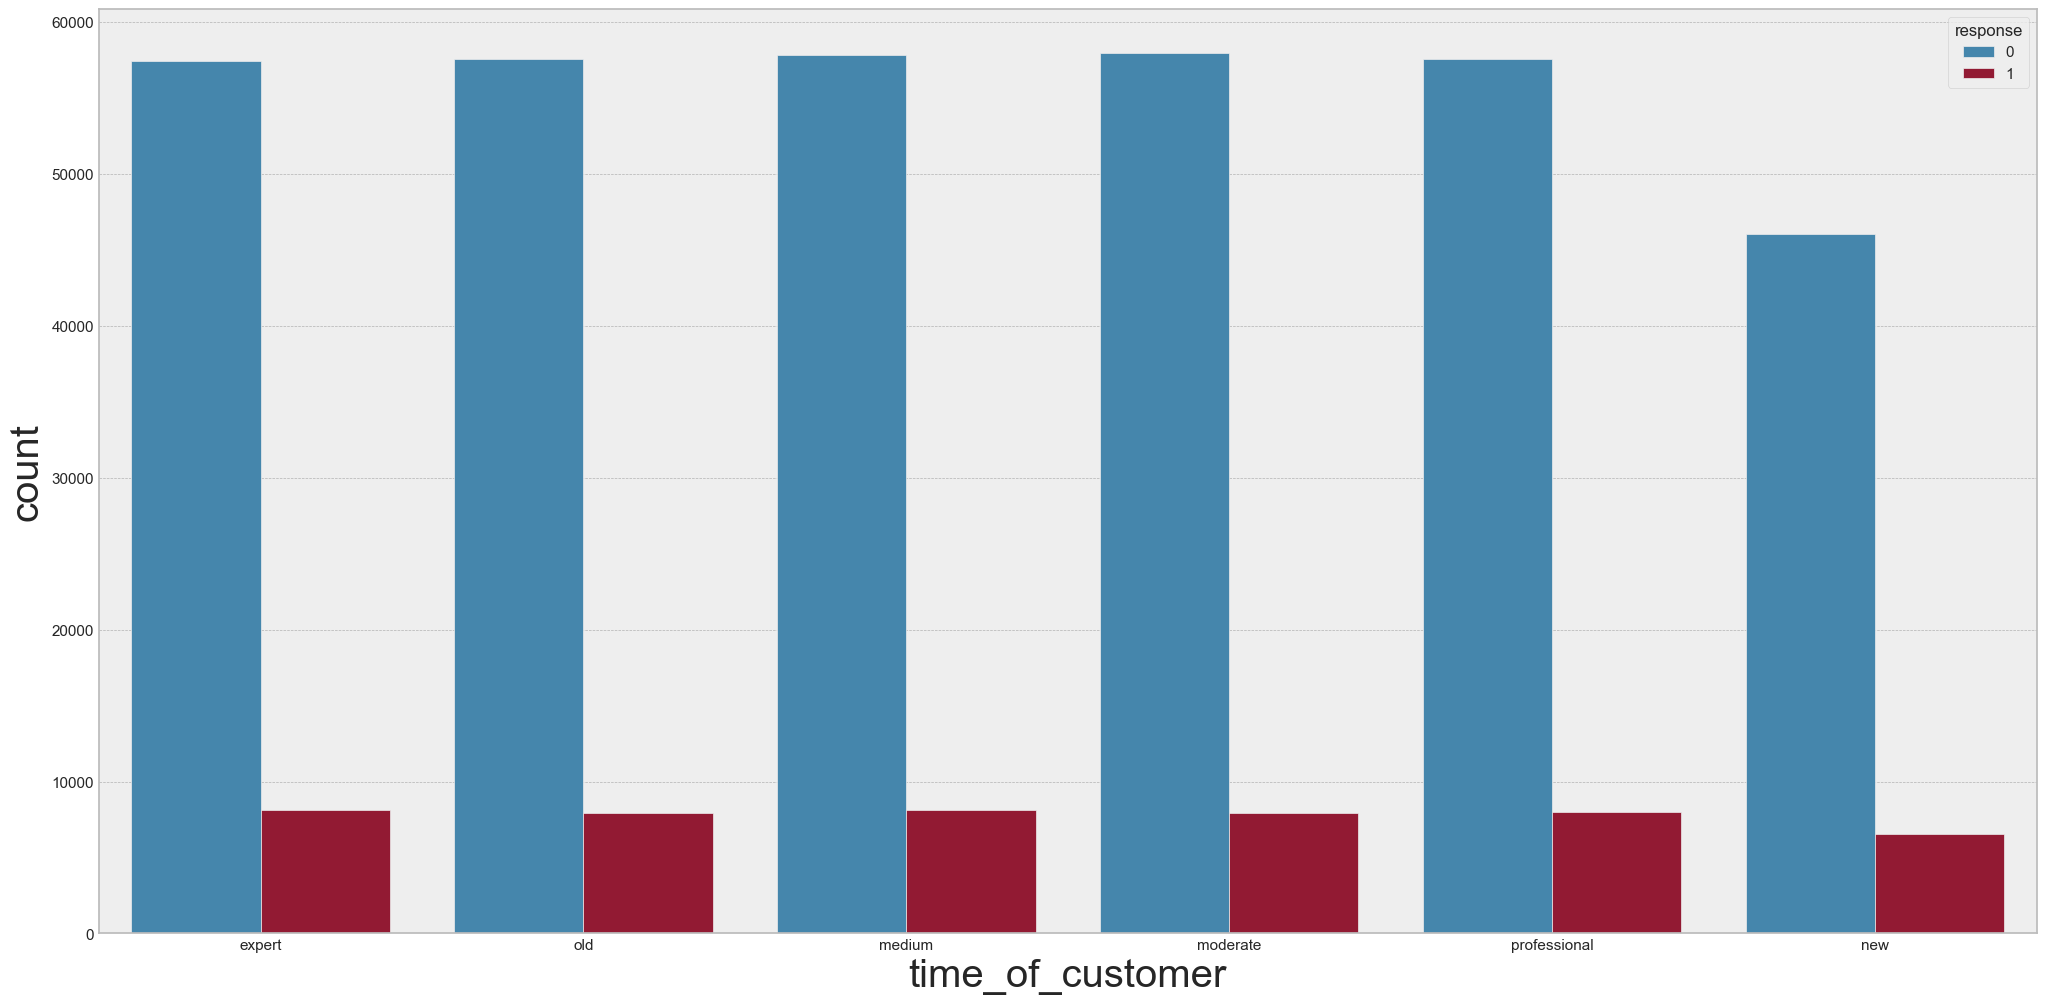

In [379]:
sns.countplot(data=df3, x='time_of_customer', hue='response')

### H4- Clientes do gênero femnino deveriam ter mais propensão a comprar

**FALSA:** Clientes do gênero feninino tem 2,71% menos de propensão a comprar o seguro

In [387]:
female_response = ((((df3['gender'] == 'Female') & (df3['response'] == 1)).sum()) / len(df3['gender']) * 100).round(2)
print(f'Clientes do gênero Female tem {female_response}% de propensão de compra do seguro.')

male_response = ((((df3['gender'] == 'Male') & (df3['response'] == 1)).sum()) / len(df3['gender']) * 100).round(2)
print(f'Clientes do gênero Male tem {male_response}% de propensão de compra do seguro.')

Clientes do gênero Female tem 4.77% de propensão de compra do seguro.
Clientes do gênero Male tem 7.48% de propensão de compra do seguro.


<Axes: xlabel='gender', ylabel='count'>

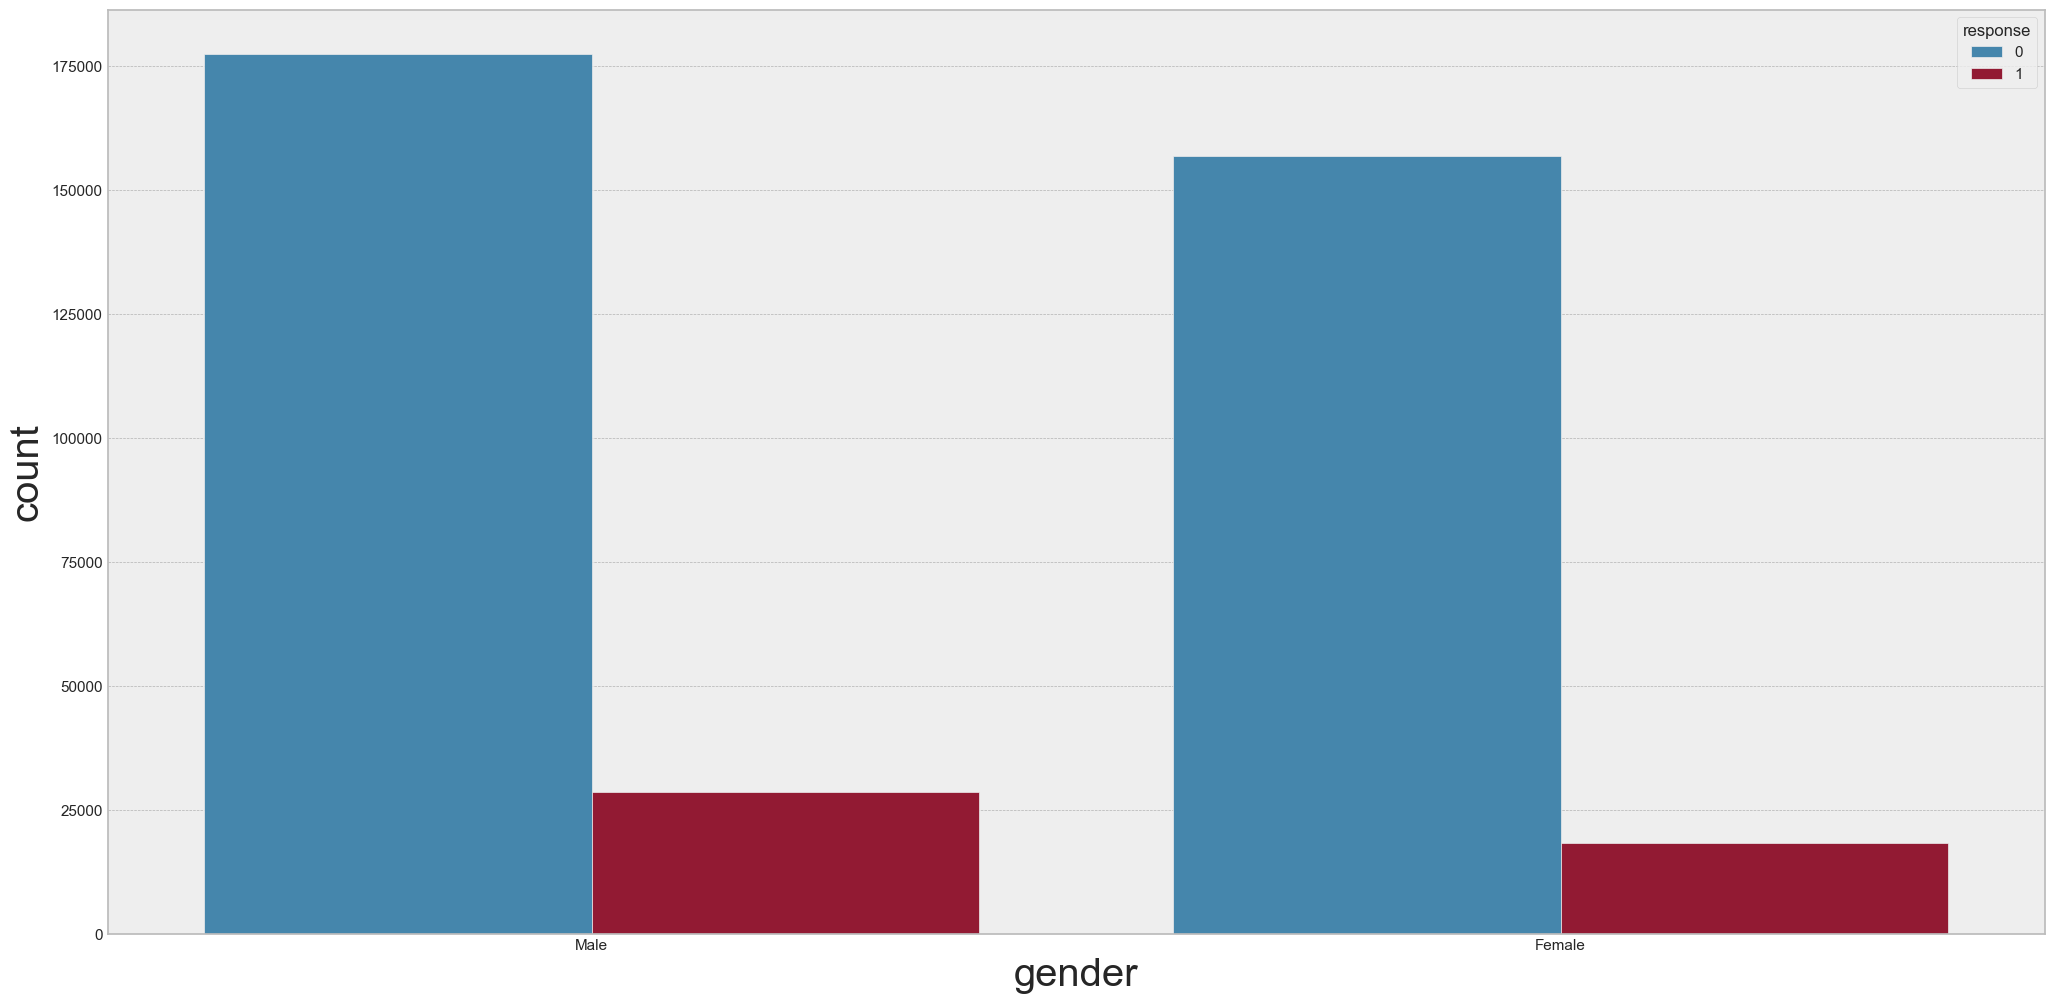

In [380]:
sns.countplot(data=df3, x='gender', hue='response')

### H5- Clientes com prêmio de seguro anual menor deveriam ter mais propensão a comprar



In [388]:
df3.columns

Index(['id', 'gender', 'age', 'region_code', 'policy_sales_channel',
       'driving_license', 'vehicle_age', 'vehicle_damage',
       'previously_insured', 'annual_premium', 'vintage', 'response',
       'time_of_customer'],
      dtype='object')

<Axes: xlabel='response', ylabel='annual_premium'>

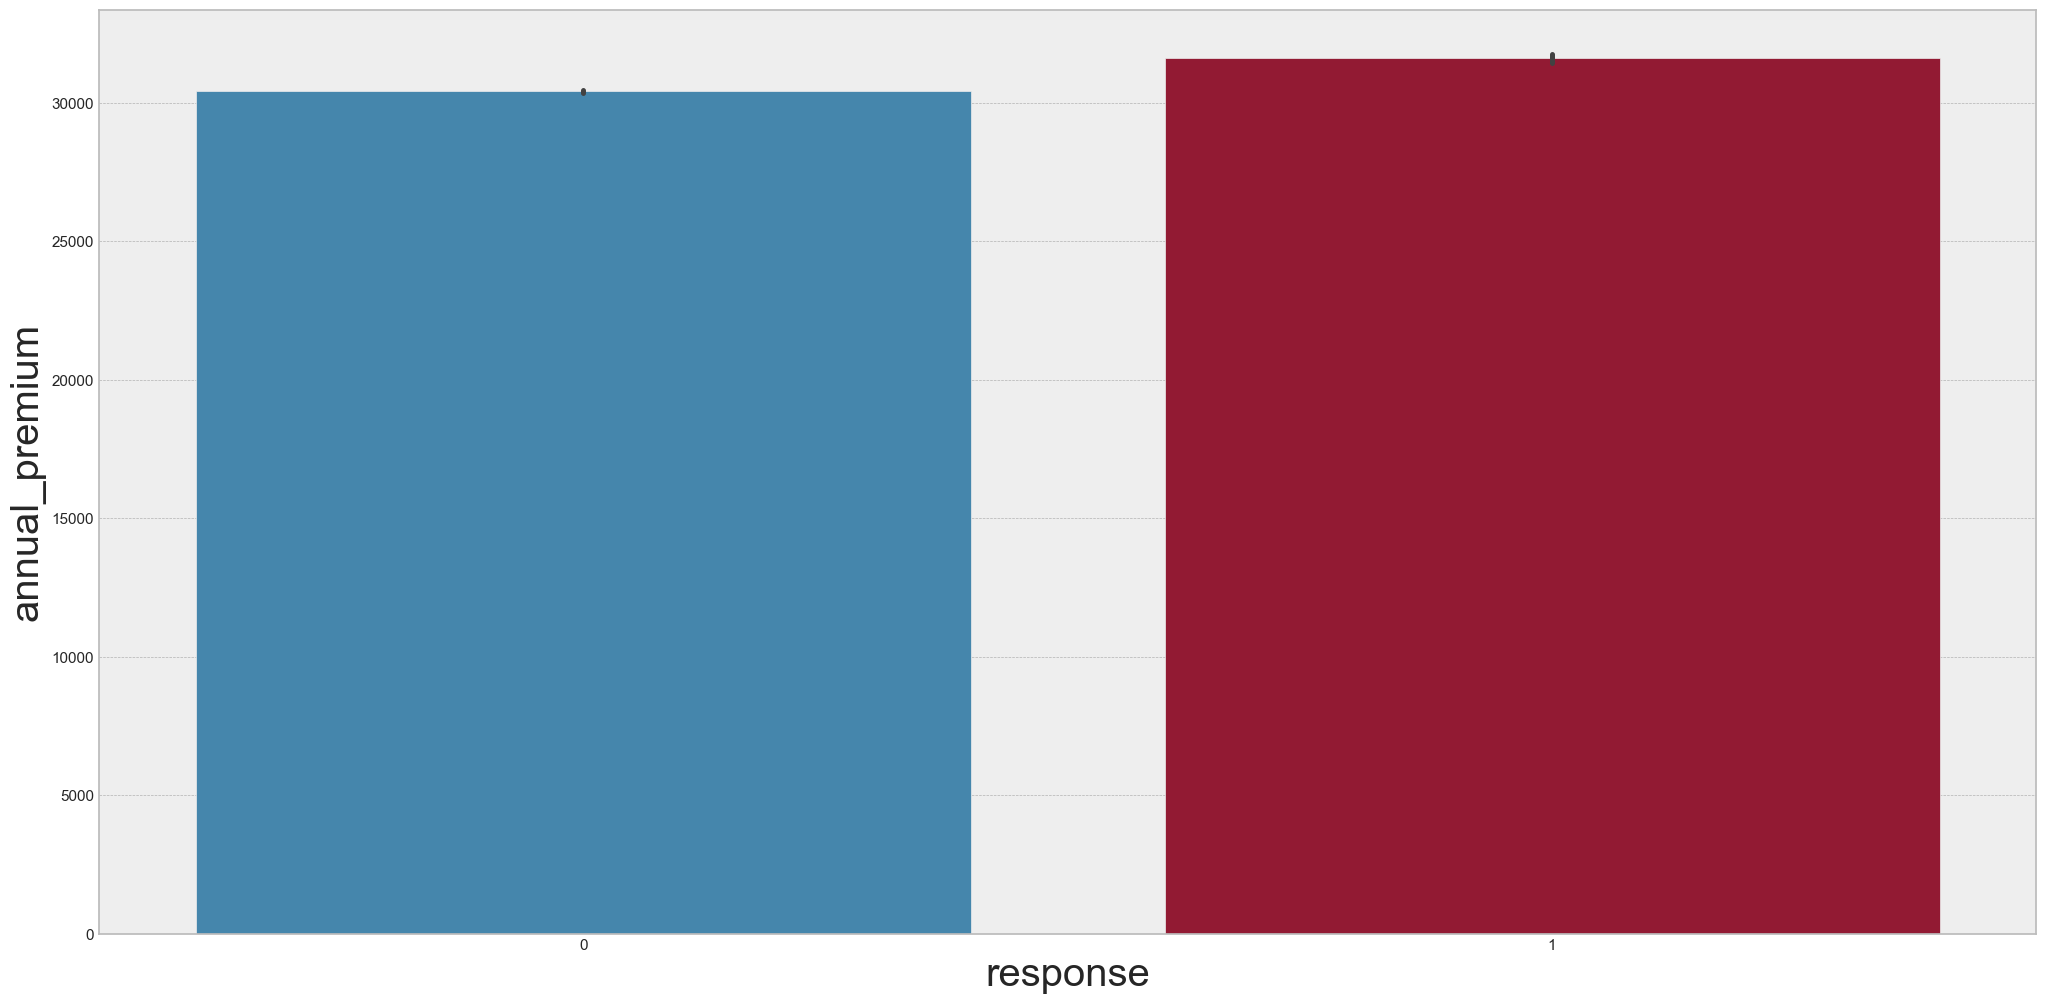

In [390]:
sns.barplot(data=df3, x='response', y='annual_premium')

### H7- Clientes que já tem seguro deveriam ter menos propensão a comprar



### H8- Clientes com veículos mais novos deveriam ter mais propensão a comprar



### H9- Clientes com veículos que já sofreram acidentes deveriam ter mais propensão a comprar

## 3.3 Análise Multivariada

### 3.3.1 Numerical Variable

In [ ]:
#correlação.hitmap

### 3.3.2 Categorical Variable

In [ ]:
#V de cramer

# 4.0 Data Preparation

In [ ]:
df4 = df3.copy()